# IPL 2022 capstone project

Loading the libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# avoiding depreceated functions warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('IPL.csv')


Basic Information

In [5]:
df.info

<bound method DataFrame.info of     match_id           date                                         venue  \
0          1  March 26,2022                      Wankhede Stadium, Mumbai   
1          2  March 27,2022                     Brabourne Stadium, Mumbai   
2          3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3          4  March 28,2022                      Wankhede Stadium, Mumbai   
4          5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   
..       ...            ...                                           ...   
69        70    May 22,2022                      Wankhede Stadium, Mumbai   
70        71    May 24,2022                         Eden Gardens, Kolkata   
71        72    May 25,2022                         Eden Gardens, Kolkata   
72        73    May 27,2022              Narendra Modi Stadium, Ahmedabad   
73        74    May 29,2022              Narendra Modi Stadium, Ahmedabad   

        team1      team2    stage toss_winn

In [6]:
#check the size of rows and columns of the dataset

print(f"Your rows are {df.shape[0]} and your columns are {df.shape[1]}")

Your rows are 74 and your columns are 20


In [7]:
# No of columns have null values in total
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Text(0.5, 1.0, 'Most match wins by team')

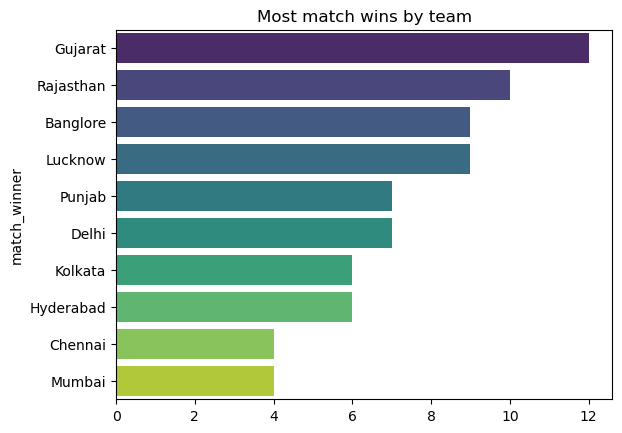

In [8]:
# which team won the most matches?
match_wins=df['match_winner'].value_counts()

sns.barplot(y=match_wins.index, x=match_wins.values,palette='viridis')
plt.title("Most match wins by team")
# type(match_wins)

Text(0.5, 1.0, 'Toss Decision Trends')

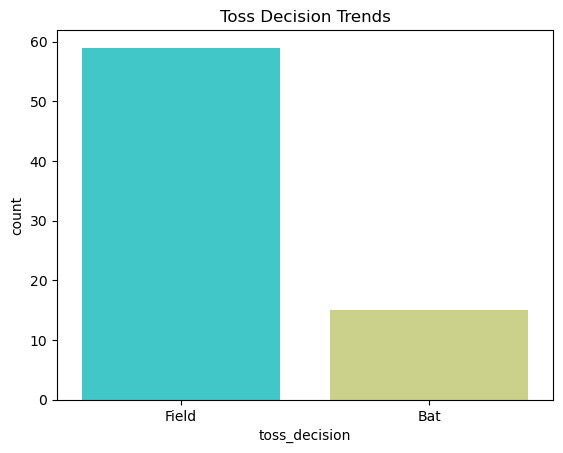

In [9]:
# Toss decision Trends

sns.countplot(x=df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Trends')

In [10]:
# Toss winner vs Match Winner

count=df[df['toss_winner']==df['match_winner']]['match_id'].count()
percentage=(count*100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

Text(0.5, 1.0, 'Won by')

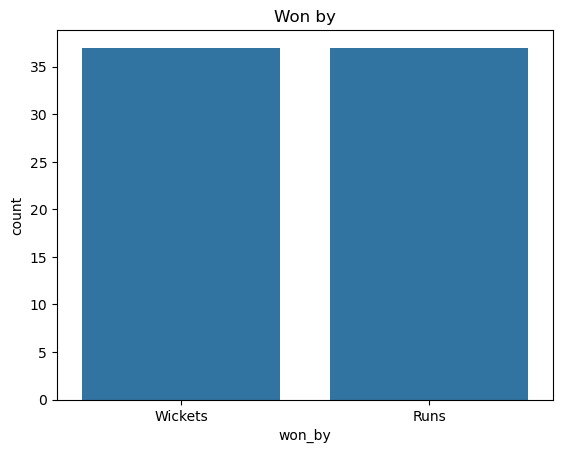

In [11]:
# how do teams win (runs vs wickets)
sns.countplot(x=df['won_by'])
plt.title("Won by")

In [12]:
# Key Player Performances

In [13]:
# 1 Most "Player of the match" awards
count=df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 players with man of the match')

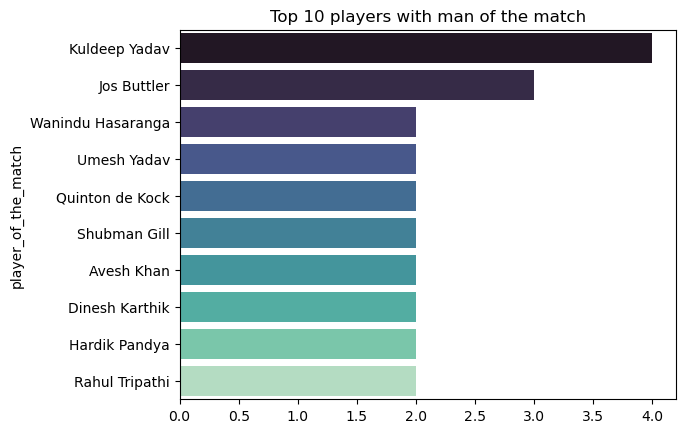

In [14]:
sns.barplot(x=count.values, y=count.index,palette='mako')
plt.title("Top 10 players with man of the match")

In [23]:
# Top Scores
high=df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

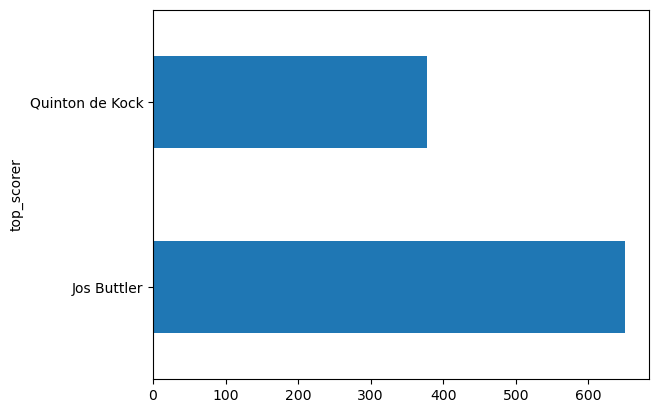

In [26]:
high.plot(kind='barh')

<Axes: ylabel='best_bowling'>

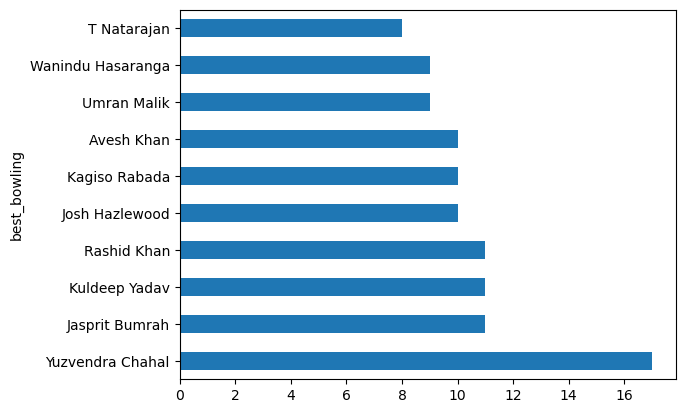

In [36]:
# 10 best bowling figures
df['highest_wickets']=df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df['highest_wickets']=df['highest_wickets'].astype(int)
top_bowlers=df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh')

In [44]:
#Most matches played by venue
df['venue'].value_counts().head(1)

venue
Wankhede Stadium, Mumbai    21
Name: count, dtype: int64

In [45]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [62]:
#Who won the highest margin by runs
df[df['won_by']=='Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


In [95]:
# which player had the highest individual score?
df.sort_values(by='highscore',ascending=False).head(1)[['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [124]:
# which blower had the best bowling figure?

df['least_bowling_runs']=df['best_bowling_figure'].apply(lambda x:x.split('--')[1])
df['least_bowling_runs']=df['least_bowling_runs'].astype(int)

highest_wicket=df[df['highest_wickets']==df['highest_wickets'].max()]
highest_wicket.sort_values(by='least_bowling_runs').head(1)[['best_bowling','best_bowling_figure']]


,best_bowling,best_bowling_figure
55,Jasprit Bumrah,5--10
